In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from Chandra.Time import DateTime
from Ska.Matplotlib import plot_cxctime
import tables

In [2]:
from netCDF4 import Dataset

In [3]:
def compare_g13_14_15_proton_rates(times, t_primary, t_secondary, channel):
    fig = plt.figure(figsize=(12, 6))
    
    okp13 = t_primary['satellite'] == 13
    oks13 = t_secondary['satellite'] == 13
    
    okp14 = t_primary['satellite'] == 14
    oks14 = t_secondary['satellite'] == 14
    
    okp15 = t_primary['satellite'] == 15
    oks15 = t_secondary['satellite'] == 15
    
    colname = f"median_{channel}"
    
    # GOES 13
    plot_cxctime(times[okp13], t_primary[colname][okp13], color='moccasin',
                 marker='o', ms='2', linestyle='None', label='G13 primary')
    plot_cxctime(times[oks13], t_secondary[colname][oks13], color='gold',
                 marker='o', ms='2', linestyle='None', label='G13 secondary')
    # GOES 14
    plot_cxctime(times[okp14], t_primary[colname][okp14], color='indianred',
                 marker='o', ms='2', linestyle='None', label='G14 primary')
    plot_cxctime(times[oks14], t_secondary[colname][oks14], color='salmon',
                 marker='o', ms='2', linestyle='None', label='G14 secondary')
    # GOES 15
    plot_cxctime(times[okp15], t_primary[colname][okp15], color='C0',
                 marker='o', ms='2', linestyle='None', label='G15 primary')
    plot_cxctime(times[oks15], t_secondary[colname][oks15], color='lightblue',
                 marker='o', ms='2', linestyle='None', label='G15 secondary')
    plt.yscale('log')
    plt.legend()
    plt.ylabel('Protons / cm2-s-sr-MeV')

    ax = fig.axes[0]
    plt.text(0.2, 0.7, channel,
             transform=ax.transAxes, fontsize=30, color='k');
    plt.grid()

## Comparison of the primary and secondary GOES proton rates since 2015

In [4]:
# GOES primary data between 2015-05-30 and 2020-01-22, daily medians for P4, P5, P6
t_primary = Table.read('goes-2015-05-30-2020-01-22.dat', format='ascii')

# GOES secondary data between 2015-05-30 and 2020-01-22, daily medians for P4, P5, P6
t_secondary = Table.read('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')

times = DateTime(t_primary['time_mjd'], format='mjd').secs

In [5]:
times = DateTime(t_primary['time_mjd'], format='mjd').secs

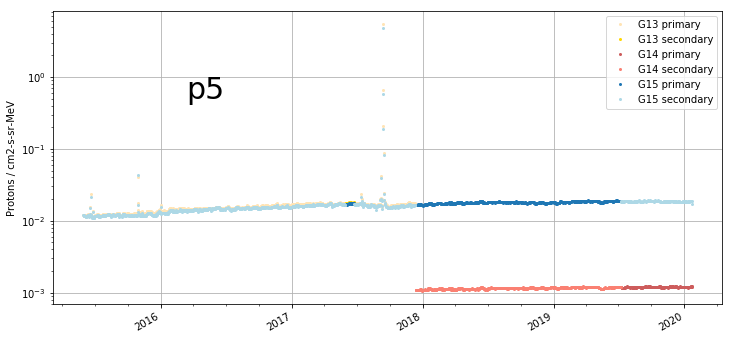

In [6]:
compare_g13_14_15_proton_rates(times, t_primary, t_secondary, 'p5');

__Figure:__ The data use to generate this plot were archived by the MTA based on the real time data (txt files) provided by the NOAA through its deprecated ftp interface at ``ftp://ftp.swpc.noaa.gov/pub/lists/pchan/``. Plotted are daily medians based on the pre-GOES-16 data. It can be seen that the GOES-14 rates (dark red -- primary GOES source, light red -- secondary GOES source) were seen to be approximately an order of magnitude lower than the GOES-13/15 rates. An order of magnitude drop in GOES HRC proxy coincided with the time when GOES-14 became the primary GOES source (July 2019). This drop was attributed to the drop in GOES-14 P5 channel rates which dominate the GOES HRC proxy formula.

## GOES-13/14/15 observations of the September 2017 flare

In [7]:
path1 = "/home/malgosia/git/mtanb/"
path2 = "/home/malgosia/git/mtanb/g16-hrc-proxy/2017-g14-data/"

# GOES-13 archival data from https://satdat.ngdc.noaa.gov/sem/goes/data/full
g13_10_file = "g13_epead_p27e_32s_20170910_20170910.nc"
nc13_10 = Dataset(f"{path1}/{g13_10_file}", "r", format="NETCDF4")

g13_11_file = "g13_epead_p27e_32s_20170911_20170911.nc"
nc13_11 = Dataset(f"{path1}/{g13_11_file}", "r", format="NETCDF4")

# GOES-15 archival data from https://satdat.ngdc.noaa.gov/sem/goes/data/full
g15_10_file = "g15_epead_p27e_32s_20170910_20170910.nc"
nc15_10 = Dataset(f"{path1}/{g15_10_file}", "r", format="NETCDF4")

g15_11_file = "g15_epead_p27e_32s_20170911_20170911.nc"
nc15_11 = Dataset(f"{path1}/{g15_11_file}", "r", format="NETCDF4")

# GOES-14 data received from Linda P.
g14_10_file = "g14_epead_p27e_32s_20170910_20170910.nc"
nc14_10 = Dataset(f"{path2}/{g14_10_file}", "r", format="NETCDF4")

g14_11_file = "g14_epead_p27e_32s_20170911_20170911.nc"
nc14_11 = Dataset(f"{path2}/{g14_11_file}", "r", format="NETCDF4")

# GOES-14 data downloaded from the NOAA archive, https://satdat.ngdc.noaa.gov/sem/goes/data/full
g14_Dec_2017_file = "g14_epead_p27e_32s_20171201_20171201.nc"
nc14_Dec_2017 = Dataset(f"{path1}/{g14_Dec_2017_file}", "r", format="NETCDF4")

g14_Feb_2020_file = "g14_epead_p27e_32s_20200229_20200229.nc"
nc14_Feb_2020 = Dataset(f"{path1}/{g14_Feb_2020_file}", "r", format="NETCDF4")

In [8]:
nc14_10.variables['P5E_UNCOR_FLUX']

<class 'netCDF4._netCDF4.Variable'>
float32 P5E_UNCOR_FLUX(record)
    description: Average flux of 63.1 MeV protons from the B detector that faces either East or West depending on the yaw flip of the satellite with no correction applied to remove higher-energy proton contamination 
    long_label: protons-5-B(63.1 MeV) flux
    short_label: p5B fx
    plot_label: p5B(63.1 MeV)
    lin_log: log
    units: p/(cm^2 s sr MeV)
    format: E10.4
    nominal_min: 0
    nominal_max: 1.0e5
    missing_value: -99999
unlimited dimensions: record
current shape = (2637,)
filling off

In [9]:
nc14_10.variables['time_tag']

<class 'netCDF4._netCDF4.Variable'>
float64 time_tag(record)
    long_name: Date and time for each observation (end-time of accumulation as stamped by spacecraft)
    units: milliseconds since 1970-01-01 00:00:00.0 UTC
    calendar: Gregorian
unlimited dimensions: record
current shape = (2637,)
filling off

__A factor for conversion from miliseconds since 1970-01-01 00:00:00.0 UTC to seconds since 1998-01-01 00:00:00.0 UTC__

In [10]:
day_01_01_1970_now = DateTime('1970-01-01T00:00:00.0').relday

In [11]:
day_01_01_1998_now = DateTime('1998-01-01T00:00:00.0').relday

In [12]:
dday = day_01_01_1998_now - day_01_01_1970_now

__Plot (the old) P5 channel__

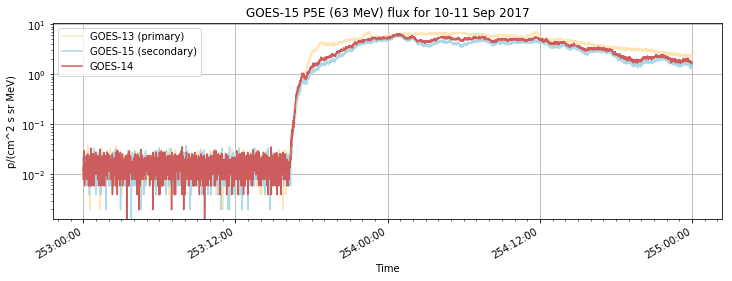

In [13]:
plt.figure(figsize=(12, 4))

# GOES-13
times = np.array(nc13_10['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc13_10['P5E_UNCOR_FLUX'], color='moccasin', label='GOES-13 (primary)')
times = np.array(nc13_11['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc13_11['P5E_UNCOR_FLUX'], color='moccasin', label='')

# GOES-15
times = np.array(nc15_10['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc15_10['P5E_UNCOR_FLUX'], color='lightblue', label='GOES-15 (secondary)')
times = np.array(nc15_11['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc15_11['P5E_UNCOR_FLUX'], color='lightblue', label='')

# GOES-14
times = np.array(nc14_10['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc14_10['P5E_UNCOR_FLUX'], color='indianred', label='GOES-14')
times = np.array(nc14_11['time_tag']) / 1000 - dday * 24 * 3600
plot_cxctime(times, nc14_11['P5E_UNCOR_FLUX'], color='indianred', label='')

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('p/(cm^2 s sr MeV)')
plt.title('GOES-15 P5E (63 MeV) flux for 10-11 Sep 2017')
plt.grid()
plt.legend();

In September 2017, GOES-13 served as the primary GOES source, and GOES-15 served as the secondary GOES source. The flare was observed also with GOES-14.

__Findings:__

  * GOES-14 rates on 10-Sep-2017 (a quiet period preceeding the flare) are at the level of __10^-2__ p / cm^2-s-sr-MeV.
  * GOES-14 rates in the quiet period (between the end of 2017 through February 2020) were seen at the level of __10^-3__ p / cm^2-s-sr-MeV and resulted in an order of mag drop in HRC proxy in July 2019 when GOES-14 became the primary GOES source (see Cell 6).
  * However, the daily medians on e.g. Dec 01, 2017 and Feb 29, 2020 computed from from \*.nc files archived on the NOAA webpage show now proton rates at the level of 10^-2 p / cm^2-s-sr-MeV (see below). This is inconsistent with the MTA archive and Aspect (Replan Central) archive for the same time period. The MTA and Aspect (Replan Central) archives were built based on the real time GOES-14 data provided by NOAA through the old ftp interface.
  * __This ~order of magnitude difference between the MTA GOES-14 archive and NOAA GOES-14 archive for the quiet period is not understood__
  
__Data source for the above plot and medians displayed in the next cell:__

* Dec 01, 2017, and Feb 29, 2020, GOES-14 data from NOAA archive
    * https://satdat.ngdc.noaa.gov/sem/goes/data/full/2017/12
    * https://satdat.ngdc.noaa.gov/sem/goes/data/full/2020/02
* Sep 10/11, 2017, GOES-13 and GOES-15 data from the NOAA archive, https://satdat.ngdc.noaa.gov/sem/goes/data/full/2017/09.
* Sep 10/11, 2017, GOES-14 data received from L. Parker.

In [14]:
median_Dec_2017 = np.median(nc14_Dec_2017['P5E_UNCOR_FLUX'])
median_Feb_2020 = np.median(nc14_Feb_2020['P5E_UNCOR_FLUX'])

In [15]:
# GOES-14 data that are currently available on NOAA webpages
median_Dec_2017, median_Feb_2020

(0.0157356, 0.0196696)

## GOES-14 rates from Replan Central archive

In [16]:
h5_file = "/proj/sot/ska/data/arc3/hrc_shield.h5"

In [17]:
with tables.open_file(h5_file, mode='r',
                      filters=tables.Filters(complevel=5, complib='zlib')) as h5:
    table = h5.root.data

In [18]:
h5 = tables.open_file(h5_file, mode='r')
table = h5.root.data
sat = table.col('satellite')
secs = table.col('time')
p4 = table.col('p4')
p5 = table.col('p5')
p6 = table.col('p6')
p7 = table.col('p7')
p9 = table.col('p9')
hrc_shield = table.col('hrc_shield')
h5.close()

In [19]:
n1 = 300000
n2 = 60000

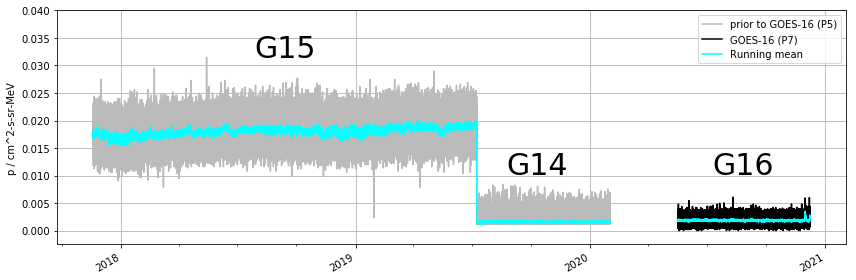

In [20]:
fig = plt.figure(1, figsize=(12, 4))

# Prior to GOES-16
bad = (hrc_shield[-n1:] < 0.1) | (sat[-n1:] == 16)
x = secs[-n1:][~bad]
y = p5[-n1:][~bad]
plot_cxctime(x, y, color="#bbbbbb", label='prior to GOES-16 (P5)')

N = 60  # 60 x 5 min = 300 min = 5 hours
y_mean = np.convolve(y, np.ones((N,))/N, mode='valid')
plot_cxctime(x[N - 1:], y_mean, color='cyan')

# GOES-16
bad = (hrc_shield[-n2:] < 0.1) | (sat[-n2:] != 16)
x = secs[-n2:][~bad]
y = p7[-n2:][~bad]
plot_cxctime(x, y, color='k', label='GOES-16 (P7)')

N = 60
y_mean = np.convolve(y, np.ones((N,))/N, mode='valid')
plot_cxctime(x[N - 1:], y_mean, color='cyan', label='Running mean')

plt.grid()
plt.ylim(-0.0025, 0.04)
plt.ylabel('p / cm^2-s-sr-MeV')
plt.legend()
plt.tight_layout()

ax = fig.axes[0]
plt.text(0.25, 0.8, 'G15', transform=ax.transAxes, fontsize=30, color='k')
plt.text(0.57, 0.3, 'G14', transform=ax.transAxes, fontsize=30, color='k')
plt.text(0.83, 0.3, 'G16', transform=ax.transAxes, fontsize=30, color='k');

__Figure:__ GOES-14 data were archived in real time also by the Aspect group through Replan Central. The above plot demonstrates again the drop in the P5 chanel rates between GOES-15 and GOES-14. The GOES-16 P7 chanel covers a similar energy band than the GOES-14/15 P5 chanels, and shows rates at the level similar to that of GOES-14 (MTA and Aspect archival data).

__Question:__ What is the reason behind the order of mag difference between the currently available NOAA GOES-14 data (https://satdat.ngdc.noaa.gov/sem/goes/data/) and the GOES-14 data that were served by NOAA in real time through the deprecated ftp interface? Could the same recalibration be relevant in case of the GOES-16 satellite, which would bring the rates we record now from GOES-16 to the levels recorded in the past by GOES-13/15?